In [97]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special
from scipy import stats
import glob
#import bioinfokit 
from bioinfokit import analys, visuz

pd.options.mode.chained_assignment = None  # default='warn'

pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',100)

In [98]:
## color blind colors
cc = {
    'blue':    '#377eb8', 
    'orange':  '#ff7f00',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#984ea3',
    'gray':    '#999999',
    'red':     '#e41a1c',
    'yellow':  '#dede00'
}

my_colors = {'bb': cc["blue"], 'anc': cc["green"], 'bn50': cc["red"], 'bn5': cc["orange"], 'A00': cc["purple"],
             "M00": cc["pink"], "iso": cc["brown"], "bleach": "#17BECF",
            0: "#e5e5e5ff", 1: "#999999ff", 15: "#1873ccff"}


In [99]:
# read in data to panda
InPathGenome="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/Grenedalf_Sep2024/defaultSettings/genome/"
filesGen=glob.glob(InPathGenome+"*_genome_diversity.csv")
InPathChr="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/Grenedalf_Sep2024/defaultSettings/chr/"
filesChr=glob.glob(InPathChr+"*_chr_diversity.csv")

outPath = "/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/Grenedalf_Sep2024/output/"
outPlots = "/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/Grenedalf_Sep2024/O_plots/"

chromosomes=["NC_003279.8","NC_003280.10","NC_003281.10","NC_003282.8","NC_003283.11","NC_003284.9","NC_001328.1"]
filesGen

['/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/Grenedalf_Sep2024/defaultSettings/genome/NIOO_bb_15_1_genome_diversity.csv',
 '/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/Grenedalf_Sep2024/defaultSettings/genome/NIOO_A00_1_1_genome_diversity.csv',
 '/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/Grenedalf_Sep2024/defaultSettings/genome/VU_bb_0_4_genome_diversity.csv',
 '/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/Grenedalf_Sep2024/defaultSettings/genome/NIOO_M00_15_5_genome_diversity.csv',
 '/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/Grenedalf_Sep2024/defaultSettings/genome/NIOO_A00_1_5_genome_diversity.csv',
 '

In [100]:
samNamGen_collect = []
samNamChr_collect = []

for i in range(0,len(filesGen)):

    ## do stuff for the genome data
    g = filesGen[i].split('/')
    samGen=g[-1].split('_')
    samNamGen="_".join(samGen[0:4])
    samNamGen_collect.append(samNamGen)

    df_gen_pre=pd.read_csv(filesGen[i],delimiter=",", index_col=False, na_values="na")
    df_gen_pre.drop(['chrom','start','end','total.masked','total.missing','total.numeric'], axis=1, inplace=True)
    df_gen_pre.columns=["emtpy","total.invariant","total.passed","sample.missing","sample.numeric","sample.passed","pi","watterson", "tajimasD"]
    df_gen_pre.insert(0, "replicate", samGen[3])
    df_gen_pre.insert(0, "week", samGen[2])
    df_gen_pre.insert(0, "treatment", samGen[1])
    df_gen_pre.insert(0, "institute", samGen[0])
    
    if i==0:
        df_genome = df_gen_pre
    else:
        df_genome = pd.concat([df_genome, df_gen_pre])

    ## &&& then for the chromosome data, loop over each chromosome 
    c = filesChr[i].split('/')
    samChr=c[-1].split('_')
    samNameChr="_".join(samChr[0:4])
    for n in range(0,len(chromosomes)):
        samNamChr_collect.append(samNameChr)

    df_chr_pre=pd.read_csv(filesChr[i],delimiter=",", index_col=False, na_values="na")
    df_chr_pre.drop(['start','end','total.masked','total.missing','total.numeric'], axis=1, inplace=True)
    df_chr_pre.columns=["chr","emtpy","total.invariant","total.passed","sample.missing","sample.numeric","sample.passed","pi","watterson", "tajimasD"]
    df_chr_pre.insert(1, "replicate", samChr[3])
    df_chr_pre.insert(1, "week", samChr[2])
    df_chr_pre.insert(1, "treatment", samChr[1])
    df_chr_pre.insert(1, "institute", samChr[0])

    if i==0:
        df_chr = df_chr_pre
    else:
        df_chr = pd.concat([df_chr, df_chr_pre])
    
df_genome.index = samNamGen_collect
df_chr.index = samNamChr_collect
df_genome

,institute,treatment,week,replicate,emtpy,total.invariant,total.passed,sample.missing,sample.numeric,sample.passed,pi,watterson,tajimasD
NIOO_bb_15_1,NIOO,bb,15,1,588258,94329838,4244379,0,0,4244379,0.004094,0.011367,-5.714051
NIOO_A00_1_1,NIOO,A00,1,1,619154,97123545,1454784,0,0,1454784,0.002633,0.004407,-3.595641
VU_bb_0_4,VU,bb,0,4,408896,89072201,9827134,0,0,9827134,0.006045,0.023676,-6.650839
NIOO_M00_15_5,NIOO,M00,15,5,466277,93828271,4828684,0,0,4828684,0.002975,0.011145,-6.547441
NIOO_A00_1_5,NIOO,A00,1,5,1104798,97025649,956509,0,0,956509,0.002372,0.003289,-2.491585
VU_bn5_15_3,VU,bn5,15,3,1414627,96278185,1136934,0,0,1136934,0.002854,0.004241,-2.920232
RUG_bb_15_2,RUG,bb,15,2,391413,89574422,9322224,0,0,9322224,0.005825,0.022495,-6.618281
NIOO_bb_15_4,NIOO,bb,15,4,350606,86828206,12131435,0,0,12131435,0.006346,0.027990,-6.906243
Gent_bb_1_1,Gent,bb,1,1,253179,89739341,9458417,0,0,9458417,0.004043,0.019706,-7.098827
RUG_bb_1_2,RUG,bb,1,2,295697,91727664,7384657,0,0,7384657,0.003761,0.015927,-6.822119


In [101]:
## write the different chromosomes in different lists, 1 per chromosome 
df_chr1 = df_chr[df_chr["chr"]==chromosomes[0]]
df_chr2 = df_chr[df_chr["chr"]==chromosomes[1]]
df_chr3 = df_chr[df_chr["chr"]==chromosomes[2]]
df_chr4 = df_chr[df_chr["chr"]==chromosomes[3]]
df_chr5 = df_chr[df_chr["chr"]==chromosomes[4]]
df_chr6 = df_chr[df_chr["chr"]==chromosomes[5]]
df_chr7 = df_chr[df_chr["chr"]==chromosomes[6]]

#df_chr6

In [102]:
# only look at backbone
## make the week numeric
df_genome['week'] = df_genome['week'].astype(int)
df_chr1['week'] = df_chr1['week'].astype(int)
df_chr2['week'] = df_chr2['week'].astype(int)
df_chr3['week'] = df_chr3['week'].astype(int)
df_chr4['week'] = df_chr4['week'].astype(int)
df_chr5['week'] = df_chr5['week'].astype(int)
df_chr6['week'] = df_chr6['week'].astype(int)
df_chr7['week'] = df_chr7['week'].astype(int)

genome_wBB = df_genome.loc[(df_genome['treatment']=="bb") | (df_genome['treatment']=="anc")]
genome_notBB = df_genome.loc[(df_genome['treatment']!="bb") | (df_genome['treatment']=="anc")]

chr1_wBB = df_chr1.loc[(df_chr1['treatment']=="bb") | (df_chr1['treatment']=="anc")]
chr1_notBB = df_chr1.loc[(df_chr1['treatment']!="bb") | (df_chr1['treatment']=="anc")]

chr2_wBB = df_chr2.loc[(df_chr2['treatment']=="bb") | (df_chr2['treatment']=="anc")]
chr2_notBB = df_chr2.loc[(df_chr2['treatment']!="bb") | (df_chr2['treatment']=="anc")]

chr3_wBB = df_chr3.loc[(df_chr3['treatment']=="bb") | (df_chr3['treatment']=="anc")]
chr3_notBB = df_chr3.loc[(df_chr3['treatment']!="bb") | (df_chr3['treatment']=="anc")]

chr4_wBB = df_chr4.loc[(df_chr4['treatment']=="bb") | (df_chr4['treatment']=="anc")]
chr4_notBB = df_chr4.loc[(df_chr4['treatment']!="bb") | (df_chr4['treatment']=="anc")]

chr5_wBB = df_chr5.loc[(df_chr5['treatment']=="bb") | (df_chr5['treatment']=="anc")]
chr5_notBB = df_chr5.loc[(df_chr5['treatment']!="bb") | (df_chr5['treatment']=="anc")]

chr6_wBB = df_chr6.loc[(df_chr6['treatment']=="bb") | (df_chr6['treatment']=="anc")]
chr6_notBB = df_chr6.loc[(df_chr6['treatment']!="bb") | (df_chr6['treatment']=="anc")]

chr7_wBB = df_chr7.loc[(df_chr7['treatment']=="bb") | (df_chr7['treatment']=="anc")]
chr7_notBB = df_chr7.loc[(df_chr7['treatment']!="bb") | (df_chr7['treatment']=="anc")]
df_genome

,institute,treatment,week,replicate,emtpy,total.invariant,total.passed,sample.missing,sample.numeric,sample.passed,pi,watterson,tajimasD
NIOO_bb_15_1,NIOO,bb,15,1,588258,94329838,4244379,0,0,4244379,0.004094,0.011367,-5.714051
NIOO_A00_1_1,NIOO,A00,1,1,619154,97123545,1454784,0,0,1454784,0.002633,0.004407,-3.595641
VU_bb_0_4,VU,bb,0,4,408896,89072201,9827134,0,0,9827134,0.006045,0.023676,-6.650839
NIOO_M00_15_5,NIOO,M00,15,5,466277,93828271,4828684,0,0,4828684,0.002975,0.011145,-6.547441
NIOO_A00_1_5,NIOO,A00,1,5,1104798,97025649,956509,0,0,956509,0.002372,0.003289,-2.491585
VU_bn5_15_3,VU,bn5,15,3,1414627,96278185,1136934,0,0,1136934,0.002854,0.004241,-2.920232
RUG_bb_15_2,RUG,bb,15,2,391413,89574422,9322224,0,0,9322224,0.005825,0.022495,-6.618281
NIOO_bb_15_4,NIOO,bb,15,4,350606,86828206,12131435,0,0,12131435,0.006346,0.027990,-6.906243
Gent_bb_1_1,Gent,bb,1,1,253179,89739341,9458417,0,0,9458417,0.004043,0.019706,-7.098827
RUG_bb_1_2,RUG,bb,1,2,295697,91727664,7384657,0,0,7384657,0.003761,0.015927,-6.822119


<Axes: xlabel='treatment', ylabel='pi'>

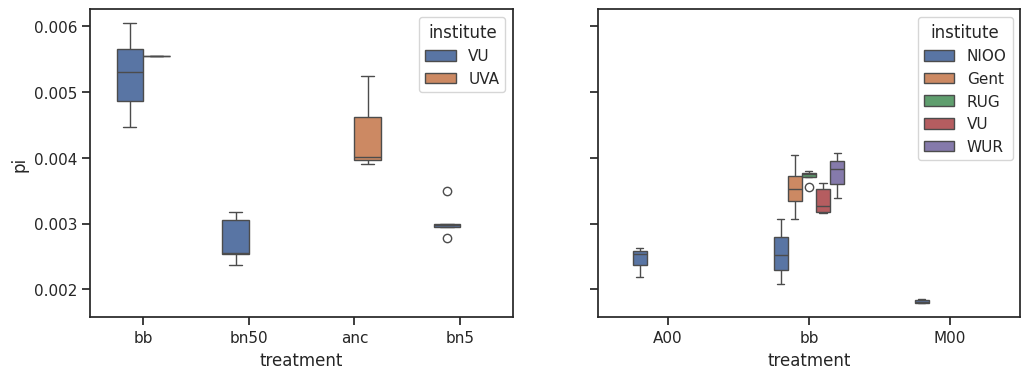

In [103]:
## hypothesis 1: the week 0 samples from different insitutions have the same genetic diversity
## --> for week 1 it is already decreased

fig1, ax1 = plt.subplots(1,2,figsize=(12,4), sharey=True)

sns.boxplot(data=df_genome[df_genome["week"]==0], x="treatment", y="pi", hue="institute", width=0.5, ax=ax1[0])
sns.boxplot(data=df_genome[df_genome["week"]==1], x="treatment", y="pi", hue="institute", width=0.5, ax=ax1[1])

#ax1[0].set_ylabel("pi at week 0")
#ax1[1].set_ylabel("pi at week 1")
#ax1[0].set_xlabel("institution")
#ax1[0].set_ylim([0.001575,0.001775])
#ax1[1].set_ylim([0.001575,0.001775])


#sns.move_legend(ax1[0], "upper center", ncol=4, bbox_to_anchor=(0.5, 1.1))
#sns.move_legend(ax1[1], "upper center", ncol=4, bbox_to_anchor=(0.5, 1.1))

#ax1[0].legend_.set_title(None)
#ax1[1].legend_.set_title(None)
#sns.despine(offset=5, trim=True)
#fig1.savefig("/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_plots/Pi_week0AND1_Coloredtreatments", 
 #            dpi=300, bbox_inches='tight')

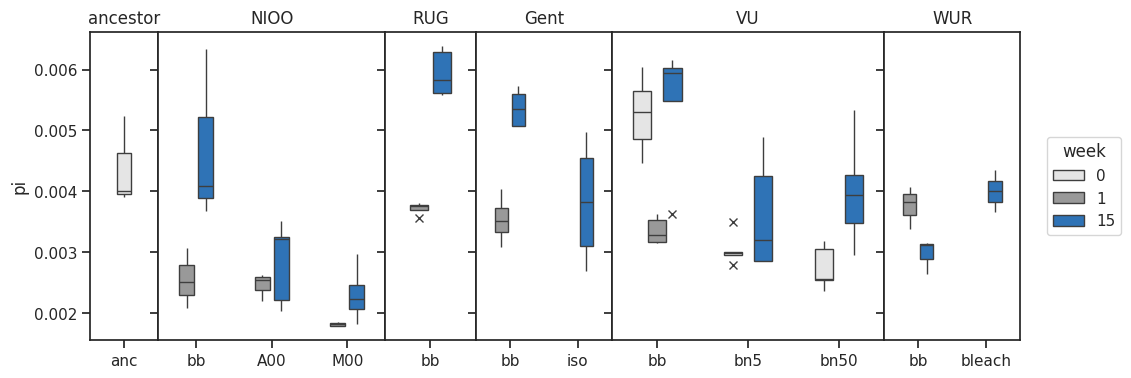

In [105]:

fig2, ax2 = plt.subplots(1,6,figsize=(12,4), sharey=True,gridspec_kw={'width_ratios': [3, 10, 4, 6, 12, 6]})
plt.subplots_adjust(wspace=0, hspace=0)

sns.boxplot(data=df_genome[(df_genome["week"]==0) & (df_genome["institute"]=="UVA") & (df_genome["treatment"]=="anc")], x="treatment",
            y="pi", widths=0.2, hue="week", ax=ax2[0], legend=None, palette=my_colors, showcaps=False, flierprops={"marker": "x"})
sns.boxplot(data=df_genome[df_genome["institute"]=="NIOO"], x="treatment", y="pi", widths=0.2, hue="week", width=0.5, ax=ax2[1], legend=None,
           palette=my_colors, showcaps=False, flierprops={"marker": "x"})
sns.boxplot(data=df_genome[df_genome["institute"]=="RUG"], x="treatment", y="pi", widths=0.2,hue="week", width=0.5, ax=ax2[2], legend=None,
           palette=my_colors, showcaps=False, flierprops={"marker": "x"})
sns.boxplot(data=df_genome[df_genome["institute"]=="Gent"], x="treatment", y="pi", widths=0.2,hue="week", width=0.5, ax=ax2[3], legend=None,
            palette=my_colors, showcaps=False, flierprops={"marker": "x"})
sns.boxplot(data=df_genome[df_genome["institute"]=="VU"], x="treatment", y="pi", widths=0.2,hue="week", width=0.5, ax=ax2[4],
            palette=my_colors, showcaps=False, flierprops={"marker": "x"})
sns.boxplot(data=df_genome[df_genome["institute"]=="WUR"], x="treatment", y="pi", widths=0.2,hue="week", width=0.5, ax=ax2[5], legend=None,
            palette=my_colors, showcaps=False, flierprops={"marker": "x"})

sns.move_legend(ax2[4], "center right", ncol=1, bbox_to_anchor=(1.9, 0.5))
sns.set_theme(style="ticks")
ax2[0].title.set_text('ancestor')
ax2[1].title.set_text('NIOO')
ax2[2].title.set_text('RUG')
ax2[3].title.set_text('Gent')
ax2[4].title.set_text('VU')
ax2[5].title.set_text('WUR')

ax2[0].set(xlabel='')
ax2[1].set(xlabel='')
ax2[2].set(xlabel='')
ax2[3].set(xlabel='')
ax2[4].set(xlabel='')
ax2[5].set(xlabel='')

fig2.savefig(outPlots + "Pi_Grenedalf_default_validLoci.png", 
             dpi=300, bbox_inches='tight')

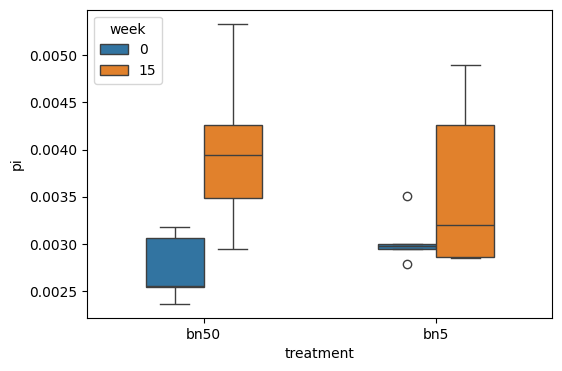

In [19]:
## hypothesis: diversity goes down over time ... or does it?

fig3, ax3 = plt.subplots(figsize=(6,4))
ax3 = sns.boxplot(data=df[(df["institute"]=="VU") & (df["treatment"]!="bb")].sort_index(), 
                  x="treatment", y="pi", hue="week", width=0.5)
#sns.move_legend(ax3, "upper center", bbox_to_anchor=(0.5, 1.2), ncol=3)


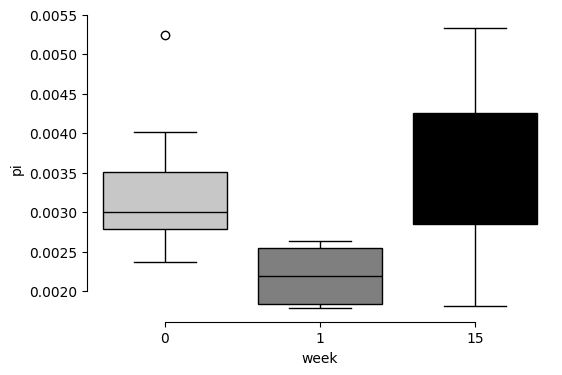

In [117]:
## hypothesis: different treatments have different diversity at the end of evolution

fig7, ax7 = plt.subplots(figsize=(6,4))
ax7 = sns.boxplot(data=genome_notBB, x="week", y="pi", hue="week", palette=my_colors, order=["0","1","15"])
#sns.move_legend(ax7, "upper center", bbox_to_anchor=(0.5, 1.2), ncol=3)
sns.despine(trim=True)
#ax7.get_legend().set_visible(False)
#ax7.legend_.set_title(title="week")
#sns.despine(offset=5, trim=True)
#ax7.set_ylim([0.0015,0.0018])

#ax7.set_ylabel("pi, backbone experiments")
#ax7.set_xlabel("week")
#fig7.savefig("/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_plots/Pi_bb_compareWeeks.png", 
 #            dpi=300, bbox_inches='tight')

In [119]:
# Perform two-sample t-test
bb_anc_w0 = genome_wBB[genome_wBB["week"]=="0"]

bb_w1 = genome_wBB[genome_wBB["week"]=="1"]

bb_w15 = genome_wBB[genome_wBB["week"]=="15"]



In [123]:

t_stat, p_value = stats.ttest_ind(bb_w1["pi"].values, bb_w15["pi"].values,equal_var= False)
print("T statistic:", t_stat)
print("P-value:", p_value)

# Setting significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis; there is a significant difference between the sample mean and the hypothesized population mean.")
else:
    print("Fail to reject the null hypothesis; there is no significant difference between the sample mean and the hypothesized population mean.")

T statistic: -5.932809467948982
P-value: 2.3927935510003627e-06
Reject the null hypothesis; there is a significant difference between the sample mean and the hypothesized population mean.
